## ASSIGNEMT 4 OF 4a
Using the following sites, or any other source, download CO2 data for a country of your choice (could be Uganda) and perform the questions that follow:

- [Global Carbon Atlas](http://www.globalcarbonatlas.org/en/CO2-emissions)
- [World Bank Climate Change](https://climateknowledgeportal.worldbank.org/)
- [UNFCCC GHG Data](https://unfccc.int/process-and-meetings/transparency-and-reporting/greenhouse-gas-data)
- [IEA Data and Statistics](https://www.iea.org/data-and-statistics)

1. Perform visualizations and analysis on the data as shown in this resource above. Additionaly,
2. Using ideas from the Applied Machine Learning and the downloaded data, outline how you would create a model to predict a country's CO2 emissions. Specify the variables you would use and why.
3. Predict the emissions of this country in 10 years based on the trend.
4. Discuss how you would validate the accuracy of your model.
5. Describe the correlation between GDP per capita and CO2 emissions per capita.

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
# This option stops scientific notation for pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# Silence some spurious seaborn warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 1. Perform visualizations and analysis on the data as shown in this resource above. Additionaly,

In [124]:
co2_data = pd.read_csv('co2-emissions-intensity-of-gdp-1990-2021.csv', skiprows=3)
co2_data.head(5)

,Year,China,United_States,European_Union,India,Japan,World
0,1980,1.84,0.60,0.33,0.30,0.33,0.45
1,1981,1.74,0.58,0.31,0.31,0.30,0.44
2,1982,1.67,0.56,0.30,0.31,0.29,0.43
3,1983,1.59,0.53,0.30,0.31,0.28,0.42
4,1984,1.51,0.52,0.29,0.33,0.29,0.42


### Visualizing CO2 Data

##### Visualization with a Time series plot

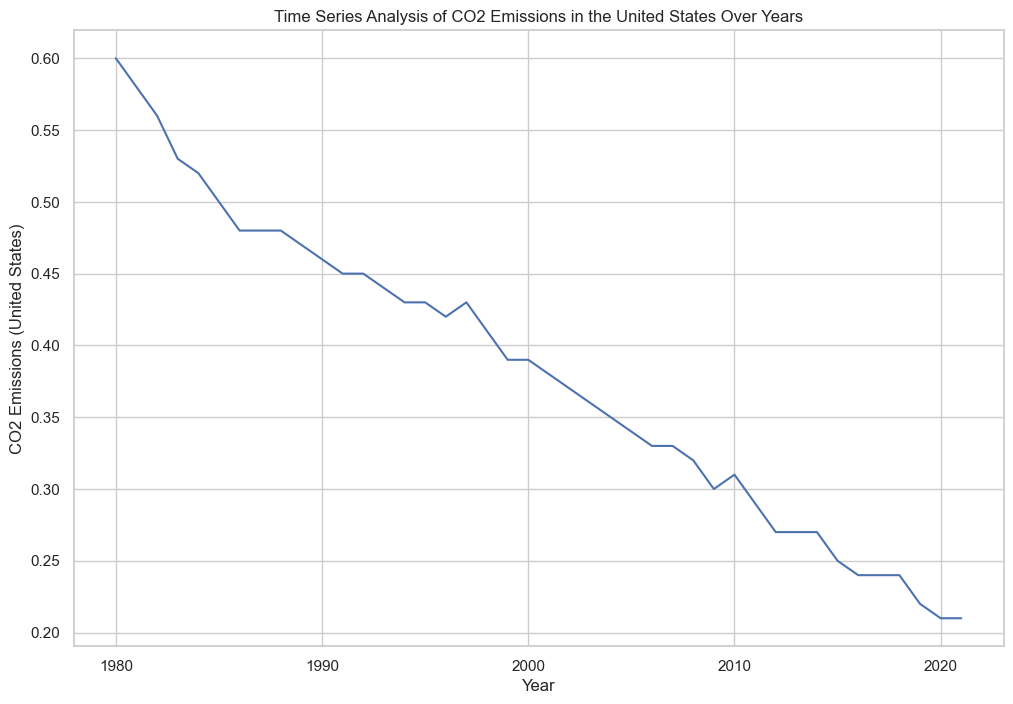

In [125]:
# Set the style
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a time series line plot
sns.lineplot(x='Year', y='United_States', data=co2_data)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (United States)')
plt.title('Time Series Analysis of CO2 Emissions in the United States Over Years')

# Show the plot
plt.show()


#### PLOTTING A BOX PLOT OF EMMISSIONS FOR ALL COUNTRIES

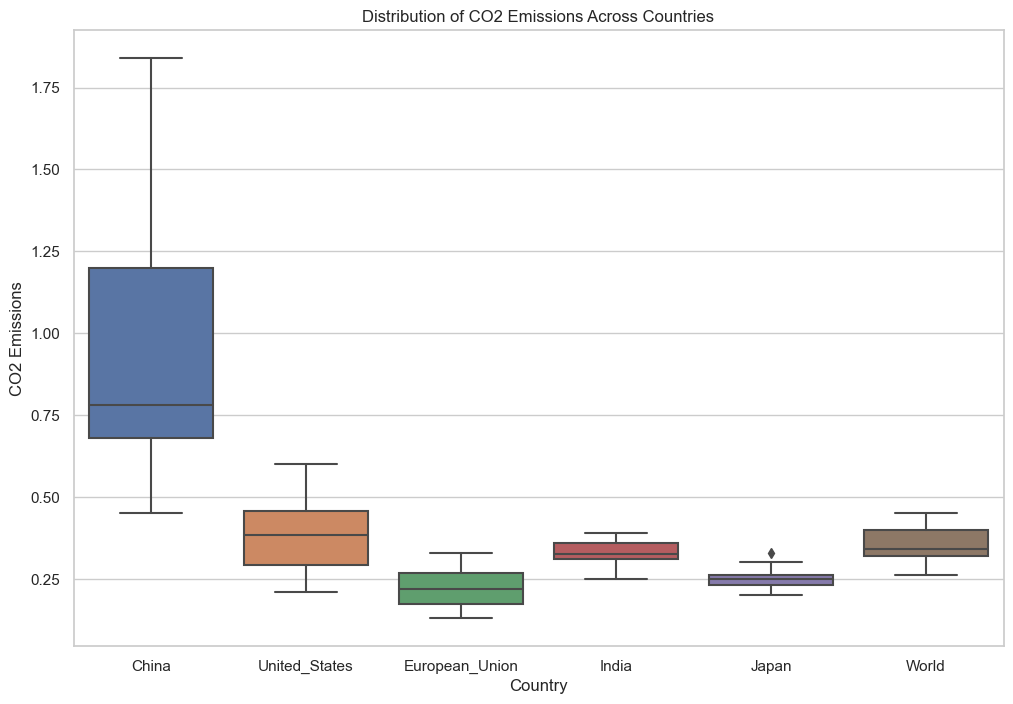

In [126]:
# Setting the style
sns.set(style="whitegrid")

# Setting the figure size
plt.figure(figsize=(12, 8))

# Creating a boxplot
sns.boxplot(data=co2_data.drop('Year', axis=1))

# Setting plot labels and title
plt.xlabel('Country')
plt.ylabel('CO2 Emissions')
plt.title('Distribution of CO2 Emissions Across Countries')

# Showing the plot
plt.show()


#### My observation is that china has more emmissions than other countries

#### PLOTTING A BAR PLOT TO VISUALIZE  EMMISSIONS FOR USA

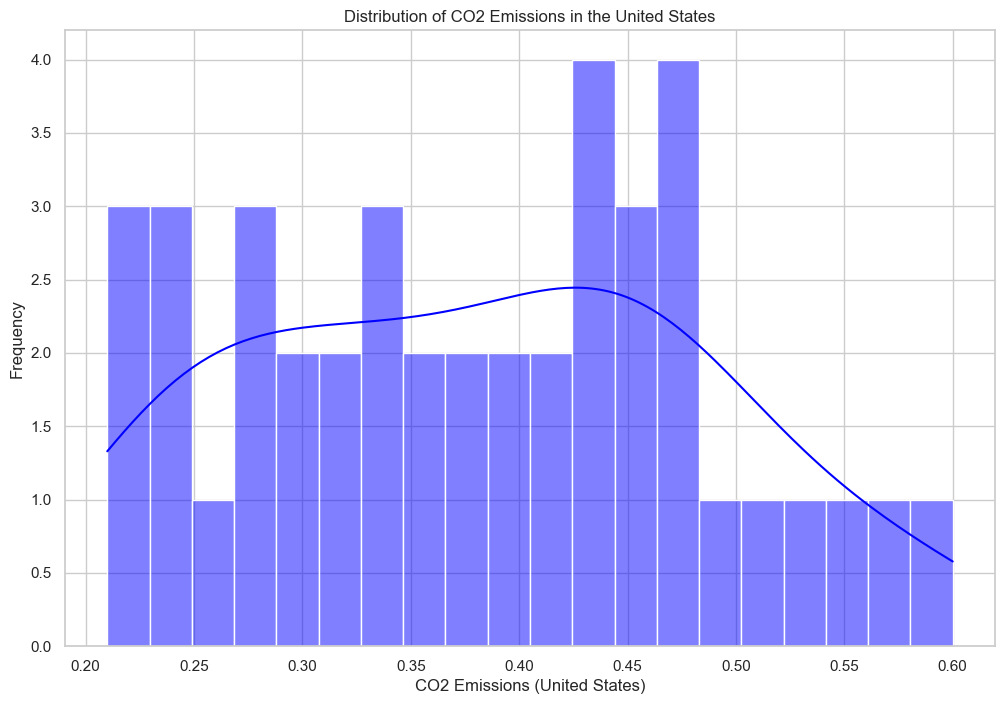

In [127]:
# Setting the style
sns.set(style="whitegrid")

# Setting the figure size
plt.figure(figsize=(12, 8))

# Creating a distribution plot
sns.histplot(co2_data['United_States'], kde=True, color='blue', bins=20)

# Setting plot labels and title
plt.xlabel('CO2 Emissions (United States)')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 Emissions in the United States')

# Showing the plot
plt.show()


##### Vizualizing with a scatter plot comparing distribution of CO2 emmissions for coutries USA and EU

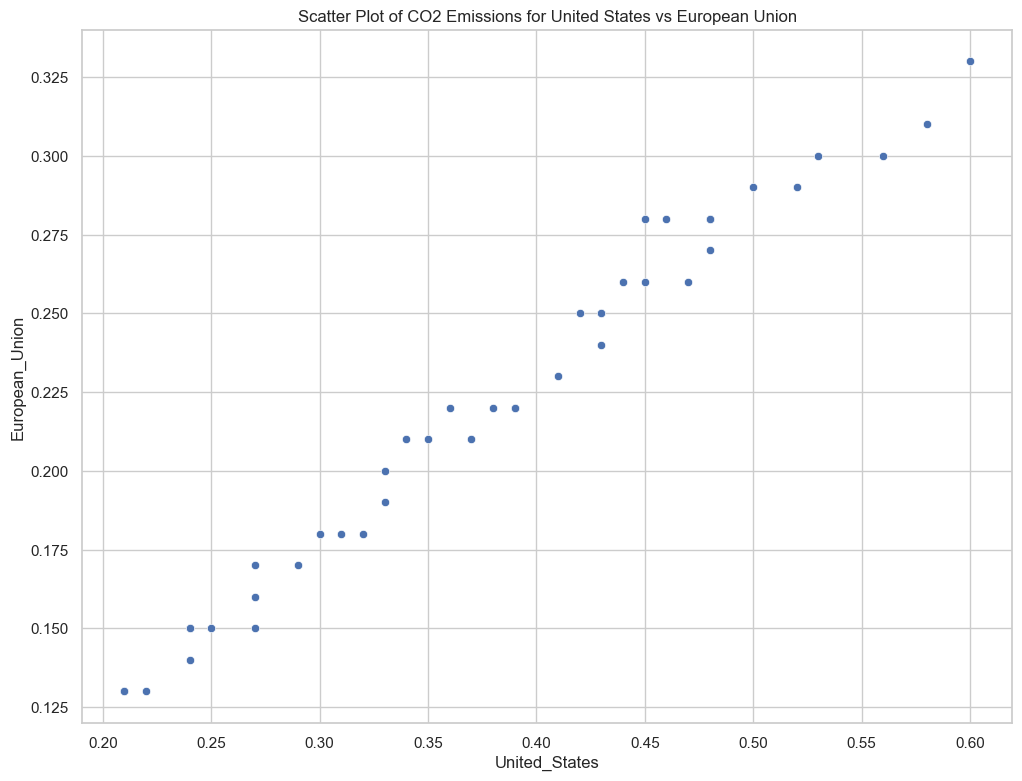

In [128]:
# Creating a scatter plot using seaborn library
sns.scatterplot(x='United_States', y='European_Union', data=co2_data)

# Setting plot labels and title
plt.xlabel('United_States')
plt.ylabel('European_Union')
plt.title('Scatter Plot of CO2 Emissions for United States vs European Union')

# Showing the plot
plt.show()

PLOTTING A PIE CHART TO SHOW THE TOTAL EMMISSIONS FOR ALL COUNTRIES

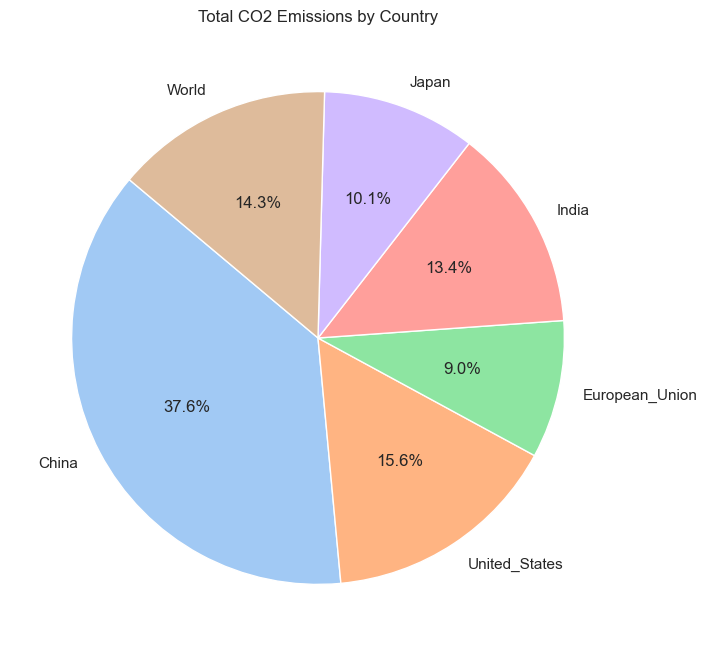

In [129]:
# Calculating the total CO2 emissions for each country
total_emissions = co2_data.drop('Year', axis=1).sum()

# Setting the style
sns.set(style="whitegrid")

# Setting the figure size
plt.figure(figsize=(12, 8))

# Creating a pie chart
plt.pie(total_emissions, labels=total_emissions.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

# Setting plot title
plt.title('Total CO2 Emissions by Country')

# Showing the plot
plt.show()


The observation still shows that china has got more emmissions than any other country followed by USA

VISUALIZING WITH A VIOLIN PLOT

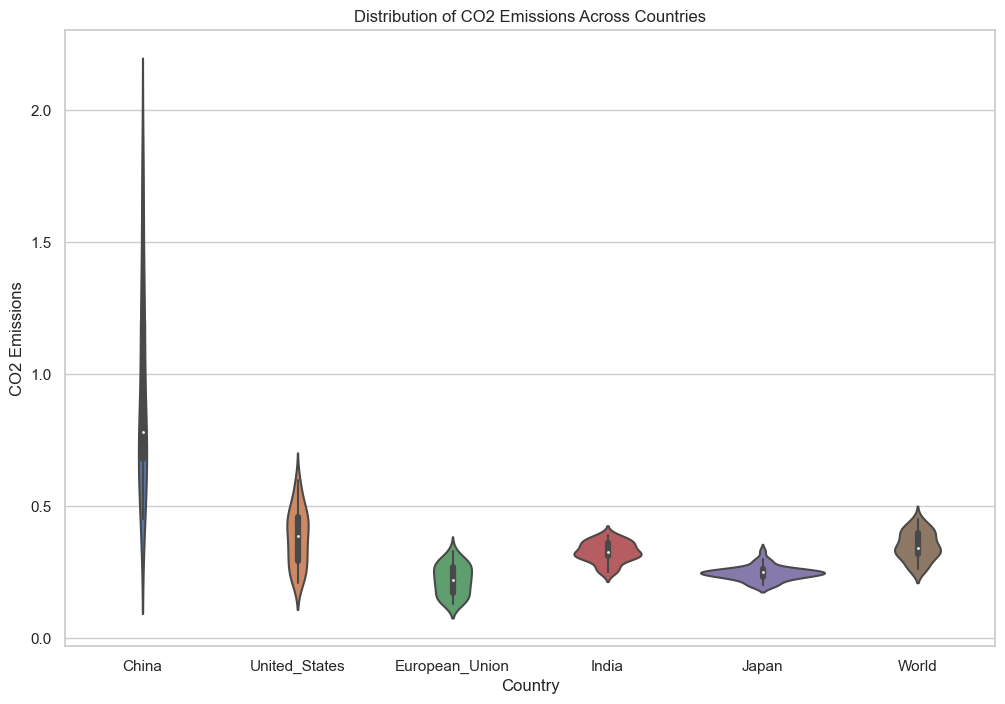

In [130]:
# Setting the style
sns.set(style="whitegrid")

# Setting the figure size
plt.figure(figsize=(12, 8))

# Creating a violin plot
sns.violinplot(data=co2_data.drop('Year', axis=1))

# Setting plot labels and title
plt.xlabel('Country')
plt.ylabel('CO2 Emissions')
plt.title('Distribution of CO2 Emissions Across Countries')

# Showing the plot
plt.show()


A violin plot also confirms china has the largets emission values

## OTHER FORMS OF VIZUALIZATION

Visualizing the column names in the dataset

In [131]:
co2_data.columns

Index(['Year', 'China', 'United_States', 'European_Union', 'India', 'Japan',
       'World'],
      dtype='object')

to view the last 4 details of the dataset

In [132]:
co2_data.tail(4)

,Year,China,United_States,European_Union,India,Japan,World
38,2018,0.48,0.24,0.14,0.26,0.20,0.27
39,2019,0.46,0.22,0.13,0.25,0.20,0.26
40,2020,0.46,0.21,0.13,0.26,0.20,0.26
41,2021,0.45,0.21,0.13,0.25,0.20,0.26


visualizing the shape of the dataset

In [133]:
co2_data.shape

(42, 7)

The dataset has 7 rows and 42 columns

##### Visualizing C02 average by YEAR for USA

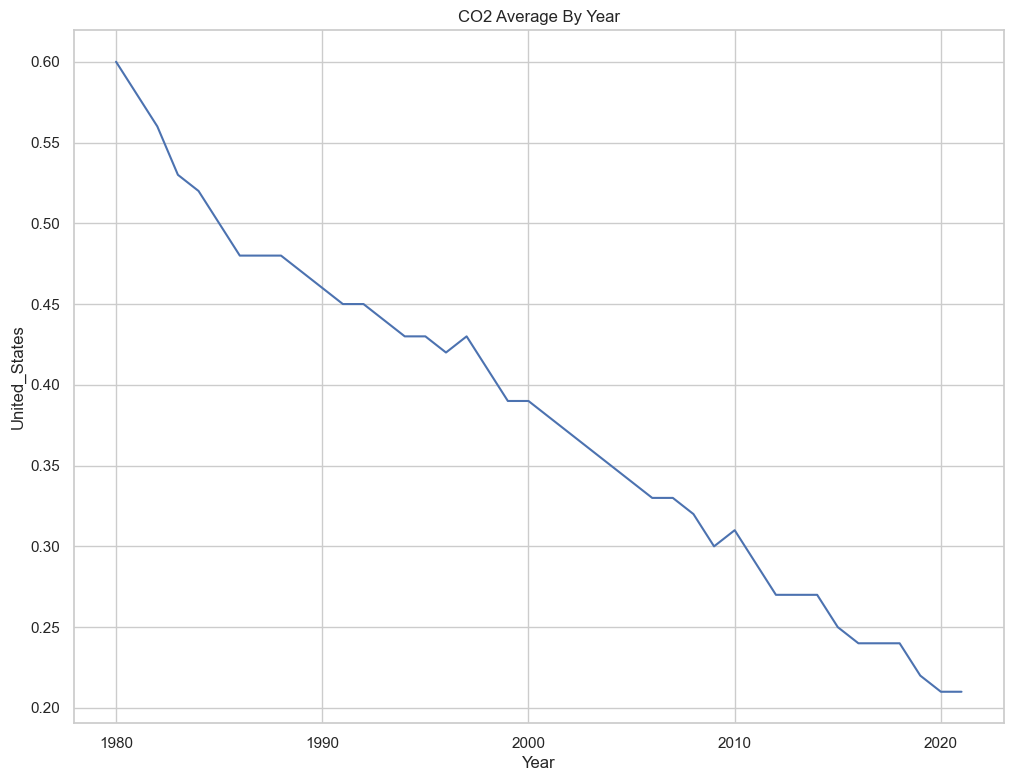

In [134]:
co2_file_year = co2_data_impute.groupby('Year').mean()
sns.lineplot(x='Year', y='United_States', data=co2_file_year)
plt.title("CO2 Average By Year");

According to the graph, the average emmissions per year have been on a downward trend in the USA 

### 2. Using ideas from the Applied Machine Learning and the downloaded data, outline how you would create a model to predict a country's CO2 emissions. Specify the variables you would use and why.

Data Exploration:

Examining the structure of the dataset, understanding the columns, and identifying the target variable (CO2 emissions) and potential predictor variables.
Checking for missing values and outliers.
Defining Target Variable and Features:

Target Variable: CO2 emissions per USD 1000.
Potential Features:
GDP per capita: Economic activity often correlates with CO2 emissions.
Year: To capture temporal trends.
Data Preprocessing:

Handle missing values and outliers in the dataset.
Encode categorical variables if any but my dataset only has numeric values
Scaling numerical features if necessary.
Train-Test Split:

Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
Selecting a Model:

Choosing a regression model suitable for predicting numerical values. Options include linear regression, decision trees, random forests, or gradient boosting models. these models perform well on numerical data.
Train the Model:

Train the selected model on the training dataset using the chosen features.
Model Evaluation:

Evaluating the model's performance on the test set using metrics such as Mean Squared Error (MSE), R-squared, or others.
Considering cross-validation to assess the model's robustness.
Interpretation:

Interpreting the model coefficients or feature importances to understand which variables have the most significant impact on predicting CO2 emissions.
Checking if the model aligns with domain knowledge and expectations.
Fine-Tuning:

Iterate on the model by fine-tuning hyperparameters or trying different algorithms to improve performance.
Deployment:

Once satisfied with the model's performance, we deploy it for predictions on new data.
Variables used in the model:

GDP per capita: Economic activity often correlates with CO2 emissions.( Thoug this is not existent in the downloaded and sampled dataset)
Year: To capture temporal trends.

### 3. Predict the emissions of this country in 10 years based on the trend.

##### Feature Engineering

FOCUS ON USA PREDICTIONS

In [135]:
# Focus on USA only
USA_info = data[['Year', 'United_States']]
USA_info.columns = ['Year', 'CO2_Emissions'] 

In [136]:
# Feature selection
# Select relevant features and target variable
X = USA_info[['Year']]
y = USA_info['CO2_Emissions']

In [137]:
from sklearn.linear_model import LinearRegression
# Initialize and train the regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

LinearRegression()

In [138]:
# Predict emissions for the next 10 years
future_years = pd.DataFrame({'Year': range(2022, 2032)}) 
predicted_emissions = regression_model.predict(future_years)

In [139]:
# Display the predicted emissions for the next 10 years
future_years['Predicted_Emissions'] = predicted_emissions
print("Predicted emissions for the next 10 years:")
print(future_years)

Predicted emissions for the next 10 years:
   Year  Predicted_Emissions
0  2022                 0.19
1  2023                 0.19
2  2024                 0.18
3  2025                 0.17
4  2026                 0.16
5  2027                 0.15
6  2028                 0.14
7  2029                 0.13
8  2030                 0.12
9  2031                 0.12


## 4. Discuss how you would validate the accuracy of your model.

##### Splitting the Data:

Separating my dataset into a training set and a testing set. This allows me to train the model on one subset and validate it on another.

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Training the Model:

Fitting the linear regression model on the training data.

In [141]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

##### Predicting and Evaluation

Using the trained model to make predictions on the testing set and evaluate its performance.

In [142]:
y_pred = regression_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 4.785160855118207e-05
R-squared Score: 0.9941326365536698


USING AN ENSEMBLE MODEL- RANDOM FOREST REGRESSOR

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Sample data for demonstration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
regression_model = RandomForestRegressor(random_state=42)
regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.00012237888888888787
R-squared Score: 0.9849944141689374


The Random Forest Regressor has demonstrated strong predictive performance on the test set, as evidenced by the very low Mean Squared Error and the high R-squared score.

### ANALYSIS ON THE RESULTS ABOVE ON LINEAR REGRESSION MODEL

##### Mean Squared Error (MSE):

The MSE is a measure of the average squared difference between the actual and predicted values. A low MSE indicates that my model's predictions are close to the actual values. In my case, having a MSE of 4.785 suggests that the model's predictions are very accurate.

##### R-squared Score:

The R-squared score is a measure of how well a model explains the variance in the data. A score of 0.994 means that my model explains approximately 99.4% of the variance in the target variable, which is excellent. 

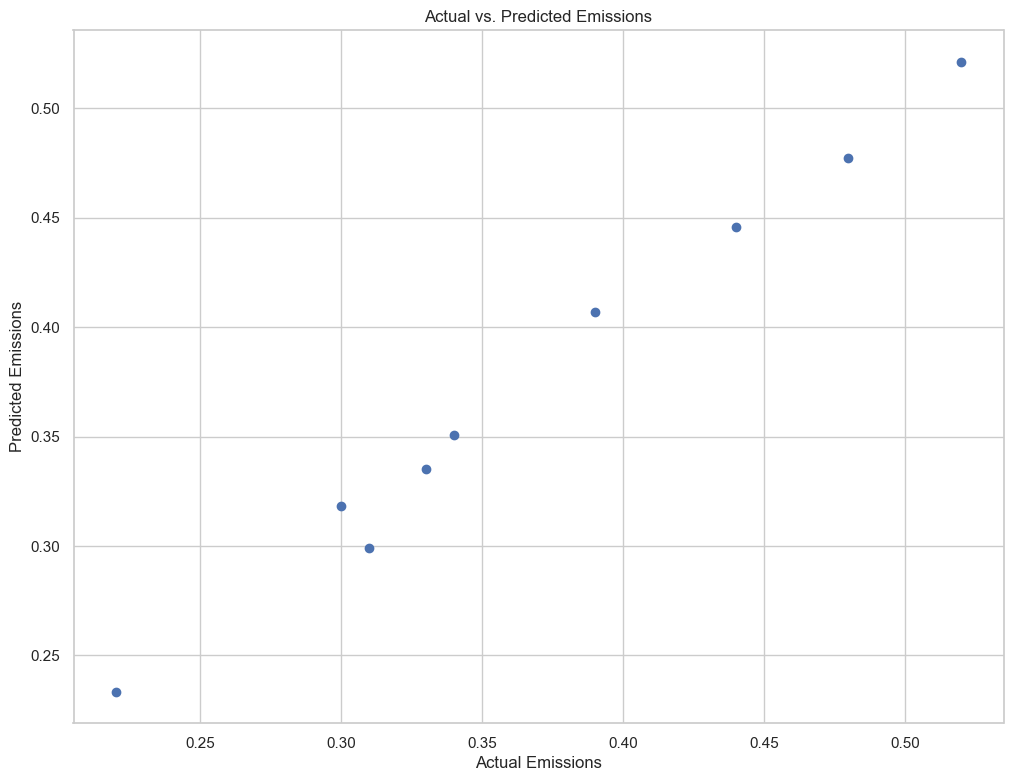

In [144]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Emissions")
plt.ylabel("Predicted Emissions")
plt.title("Actual vs. Predicted Emissions")
plt.show()


## 5. Describe the correlation between GDP per capita and CO2 emissions per capita.

Analysis:
The dataset includes values for China, the United States, the European Union, India, Japan, and the world.
Over the years, there are noticeable patterns in the emissions per unit of GDP for each country and the world.
This implies that:

If CO2 emissions per unit of GDP decrease over time, it might suggest that countries are becoming more efficient in terms of carbon emissions per economic output.
otherwise, an increase in emissions per unit of GDP may suggest that the environmental impact of economic activities is growing.

Comparison Across Countries:

sine the alayzed dataset doesnt include GDP per capita, so the analysis is based on emissions per unit of GDP rather than the direct relationship between GDP per capita and CO2 emissions per capita.

In summary, while the dataset doesn't explicitly include GDP per capita, we may describe trends in CO2 emissions per unit of GDP over time for the given countries and the world.